In [ ]:
!git clone https://github.com/sam123sonu/face_recog.git

fatal: destination path 'face_recog' already exists and is not an empty directory.


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam,RMSprop
from keras.models import Model

In [ ]:
with open("face_recog/pickle_data/images.p","rb") as f:
  images = pickle.load(f)

with open("face_recog/pickle_data/labels.p","rb") as f:
  labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)
print(set(labels))

(494, 100, 100)
(494,)
{'Durga', 'Ashutosh', 'Arnab', 'Malay', 'sambit'}


In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
print(set(labels))


{0, 1, 2, 3, 4}


In [ ]:
n_classes = len(set(labels))
label_mapping = le.inverse_transform(np.arange(n_classes))
print(label_mapping)

['Arnab' 'Ashutosh' 'Durga' 'Malay' 'sambit']


In [ ]:
for i in range(n_classes):
  print("person {} is {}".format(i,le.inverse_transform([i])))

person 0 is ['Arnab']
person 1 is ['Ashutosh']
person 2 is ['Durga']
person 3 is ['Malay']
person 4 is ['sambit']


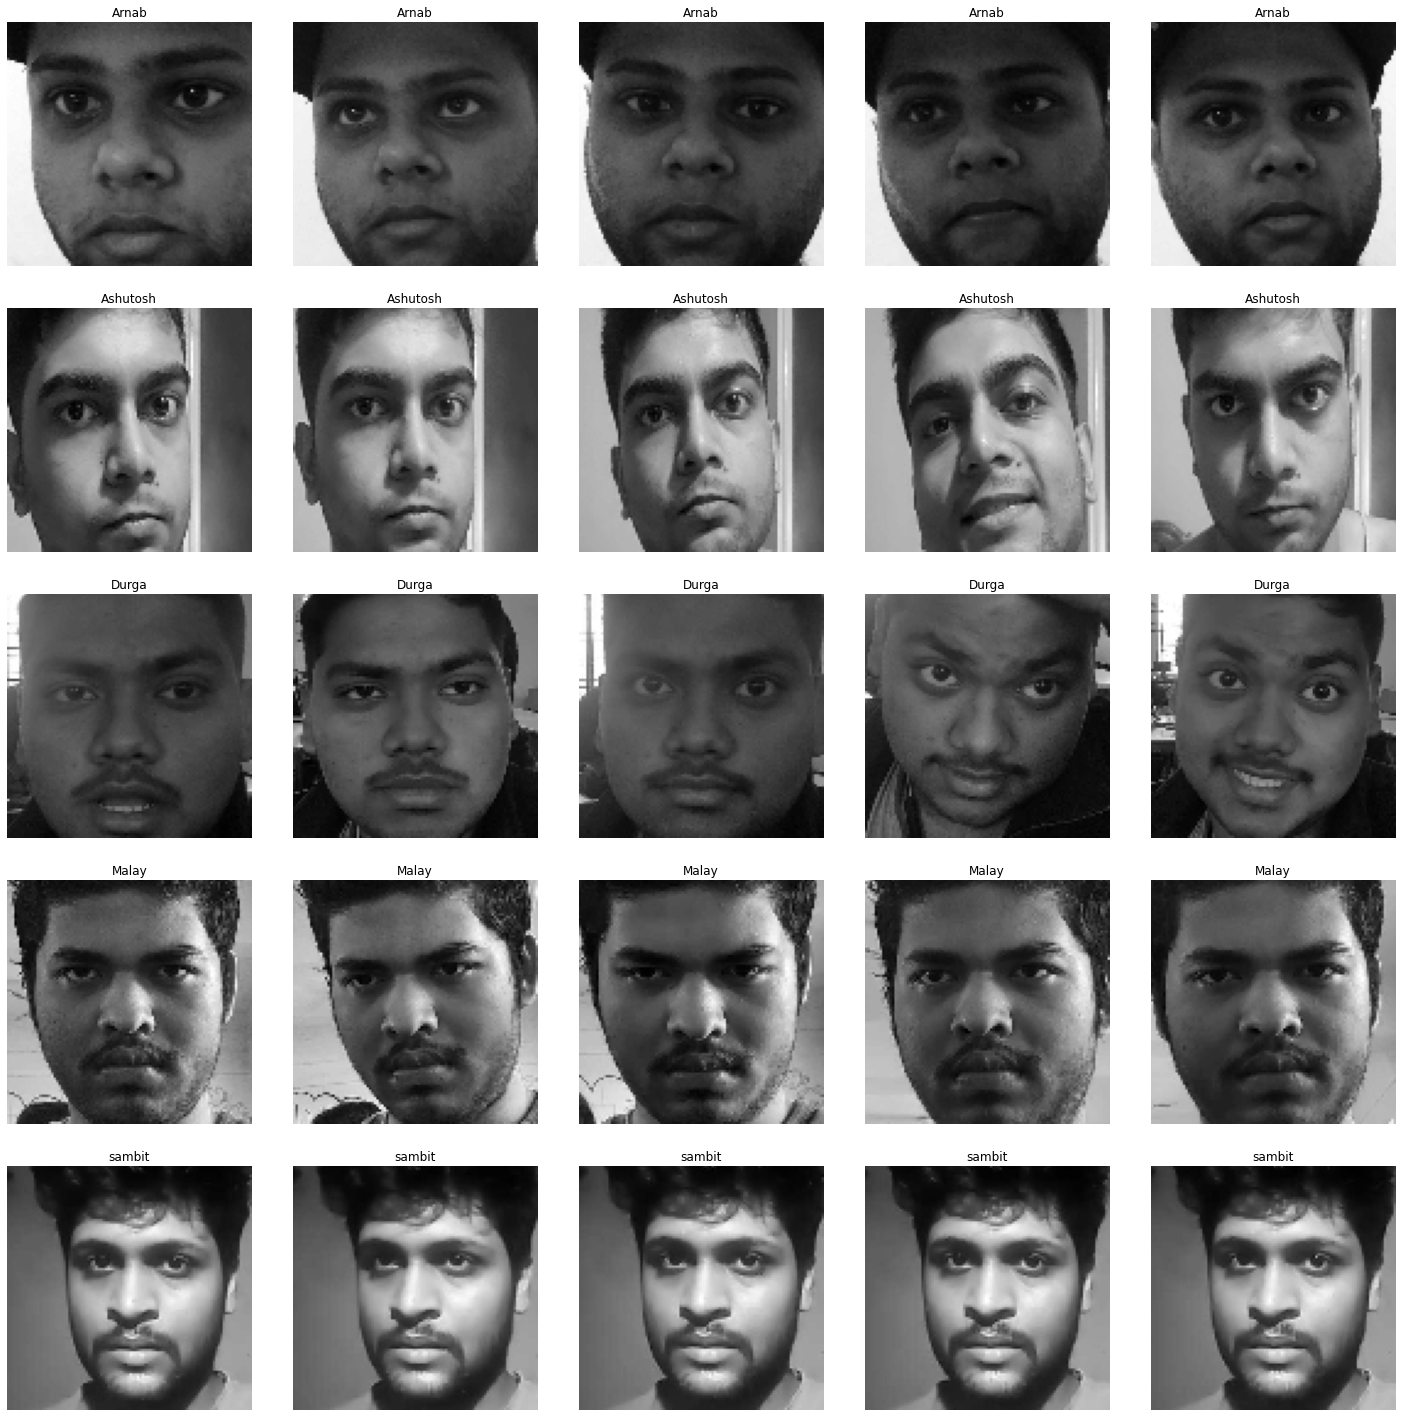

In [ ]:
fig,axes = plt.subplots(nrows=n_classes,ncols=5,figsize=(20,20))
fig.tight_layout()

for i in range(n_classes):

  for j in range(5): 
    axes [i][j].imshow(images[labels==i][np.random.randint(0,len(images[labels==i]))],cmap="gray")
    axes[i][j].axis("off")
    axes[i][j].set_title(label_mapping[i])


In [ ]:
def preprocess(img):
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [ ]:
images = np.array(list(map(preprocess,images)))

In [ ]:
print(images.shape)

(494, 100, 100, 1)


In [ ]:
xtr,xts,ytr,yts = train_test_split(images,labels,test_size=0.1,random_state=0)

In [ ]:
ytr = to_categorical(ytr,n_classes)
yts = to_categorical(yts,n_classes)

In [ ]:
print(xtr.shape)

(444, 100, 100, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(100,100,1),strides=2,activation="relu"))
model.add(Conv2D(32,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(216,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.compile(RMSprop(learning_rate=1e-4),loss=["categorical_crossentropy"],metrics = ["accuracy"])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)             

In [ ]:
model.fit(xtr,ytr,epochs=25,verbose=1,validation_data=(xts,yts))

Epoch 1/25
14/14 [==============================] - 7s 478ms/step - loss: 1.3743 - accuracy: 0.4032 - val_loss: 1.1004 - val_accuracy: 0.6800
Epoch 2/25
14/14 [==============================] - 6s 462ms/step - loss: 0.6697 - accuracy: 0.8514 - val_loss: 0.4807 - val_accuracy: 0.9400
Epoch 3/25
14/14 [==============================] - 6s 462ms/step - loss: 0.2552 - accuracy: 0.9550 - val_loss: 0.1226 - val_accuracy: 1.0000
Epoch 4/25
14/14 [==============================] - 7s 465ms/step - loss: 0.1532 - accuracy: 0.9640 - val_loss: 0.0761 - val_accuracy: 1.0000
Epoch 5/25
14/14 [==============================] - 7s 467ms/step - loss: 0.0475 - accuracy: 0.9955 - val_loss: 0.1076 - val_accuracy: 0.9800
Epoch 6/25
14/14 [==============================] - 7s 466ms/step - loss: 0.0374 - accuracy: 0.9955 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 7/25
14/14 [==============================] - 7s 467ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 

In [ ]:
layer0 = Model(model.layers[0].input,model.layers[0].output)

In [ ]:
features = layer0.predict(xts[49].reshape(1,100,100,1))

In [ ]:
features.shape

(1, 48, 48, 32)

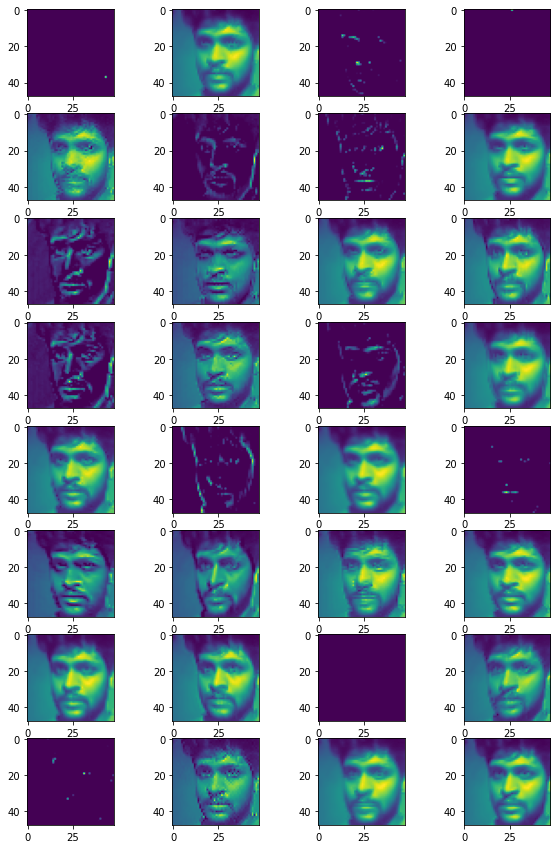

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8,4,i+1)
  plt.imshow(features[0,:,:,i])

In [ ]:
model.save("FACE-RECOG.h5")